<h1 align="center"> Лабораторная работа №2 </h1>

---

<h1 align="center"> Университет ИТМО </h1>
<h2 align="center"> Факультет систем управления и робототехники </h2>

---

### Выполнили:
- **Соколов Никита**  
- **Минеев Кирилл**
- **Соловьев Дмитрий**
- **Семёнов Евгений**

---

### Проверил:
- **Догадин Егор Витальевич**

---

### 23 сентября 2024 г.

---

# Подготовка.

### Установка необходимых библиотек:

In [547]:
!pip install numpy matplotlib sympy


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [548]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import random
import math;

### Придумаем четыре целых числа a, b, c, d таким образом, чтобы все они были различными и ни одно из них не равнялось 0 или ±1.

In [549]:
a = random.randint(1, 6)
b = random.randint(a + 1, 11)
c = random.randint(b + 1, 16)
d = random.randint(c + 1, 21)

print(a, b, c, d, sep = "\t")

1	8	13	18


### Исходные значения x и y:

In [550]:
x_min, x_max = -5, 5
y_min, y_max = -4, 4

x_old = np.linspace(x_min, x_max, 11)
y_old = np.linspace(y_min, y_max, 9)
xy_old = np.column_stack([[x, y] for x in x_old for y in y_old])

### Функция для визуализации линейных отображений: 

In [551]:
colors = list(map(lambda x, y: (min(1, 1-y/4), min(1, 1+y/4), 1/5 + x/25), xy_old[0], xy_old[1]))

def plot_grid(xy_grid):
    plt.figure(figsize=(6, 6), facecolor="w")
    plt.scatter(xy_grid[0], xy_grid[1], s = 50, c = colors)
    plt.axis('equal')
    plt.grid(True)
    

### Функция для построения прямых:

In [552]:
def plot_line(k):
    x = np.linspace(x_min, x_max, 11)
    y = k * x
    plt.plot(x, y, color="red")
    plt.ylim(y_min, y_max)
    plt.show()

### Исходная сетка значений:

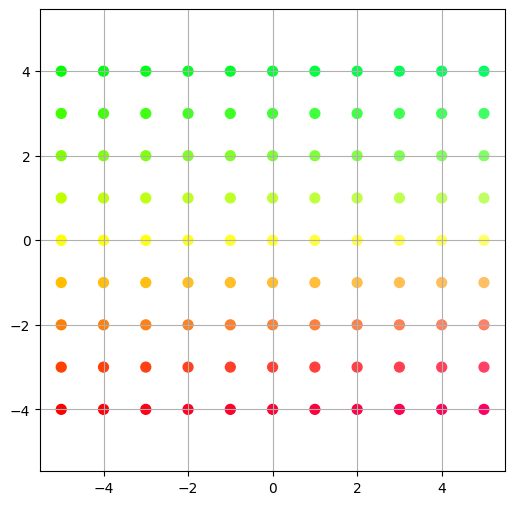

In [553]:
plot_grid(xy_old)

# Задание 1.

<h3 style="font-weight: bold;">1. Отражение (симметрия) плоскости относительно прямой y = ax. </h3>

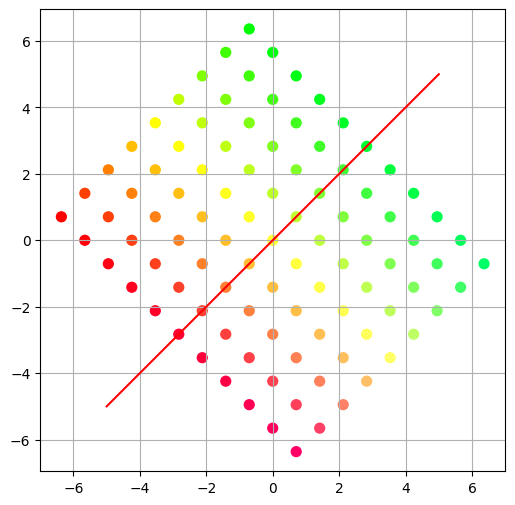

⎡0.707106781186548   0.707106781186548⎤
⎢                                     ⎥
⎣-0.707106781186548  0.707106781186548⎦


In [554]:
theta_angle = -(math.pi / 2 - np.arctan(a))

first_matrix = Matrix([
    [np.cos(theta_angle), -np.sin(theta_angle)],
    [np.sin(theta_angle), np.cos(theta_angle)]
])

xy_new = np.dot(first_matrix, xy_old)
plot_grid(xy_new)
plot_line(a)

pprint(first_matrix)

<h3 style="font-weight: bold;">2. Отображение всей плоскости в прямую y = bx </h3>

⎡1  1⎤
⎢    ⎥
⎣8  8⎦


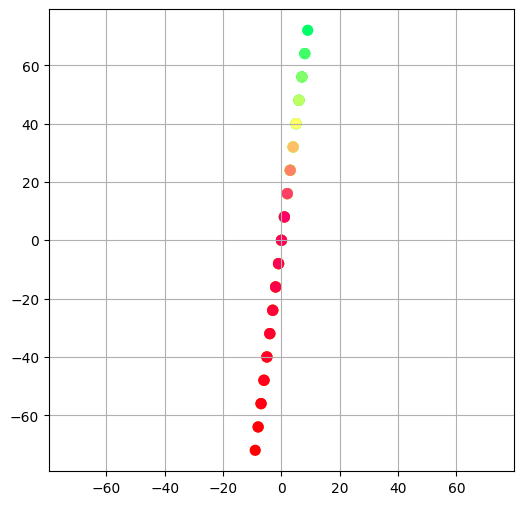

In [555]:
second_matrix = Matrix([
    [1, 1], 
    [b, b]
])

xy_new = np.dot(second_matrix, xy_old)
plot_grid(xy_new)

pprint(second_matrix)

<h3 style="font-weight: bold;">3. Поворот плоскости на 10c градусов против часовой стрелки.</h3>

⎡0.707106781186548   0.707106781186548⎤
⎢                                     ⎥
⎣-0.707106781186548  0.707106781186548⎦


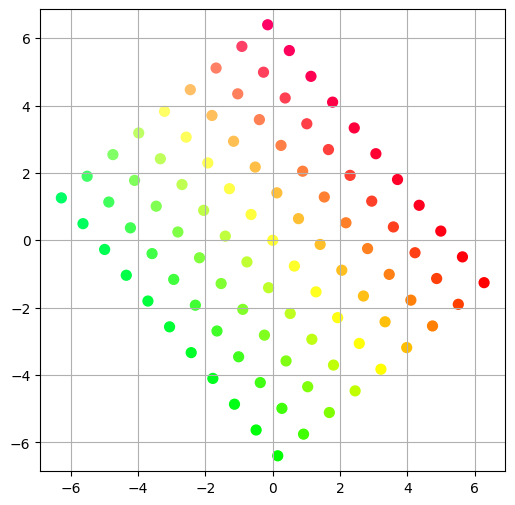

In [556]:
alpha_angle = np.radians(10 * c)

third_matrix = Matrix([
    [np.cos(alpha_angle), -np.sin(alpha_angle)],
    [np.sin(alpha_angle), np.cos(alpha_angle)]
])

xy_new = np.dot(third_matrix, xy_old)
plot_grid(xy_new)

pprint(first_matrix)